In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle

In [2]:
data = pd.read_csv('F:/Crop Prediction/data/dataset/Fertilizer Prediction.csv')
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [4]:
data.shape

(99, 9)

In [5]:
data['Soil Type'].value_counts()

Soil Type
Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: count, dtype: int64

<Axes: xlabel='Soil Type', ylabel='count'>

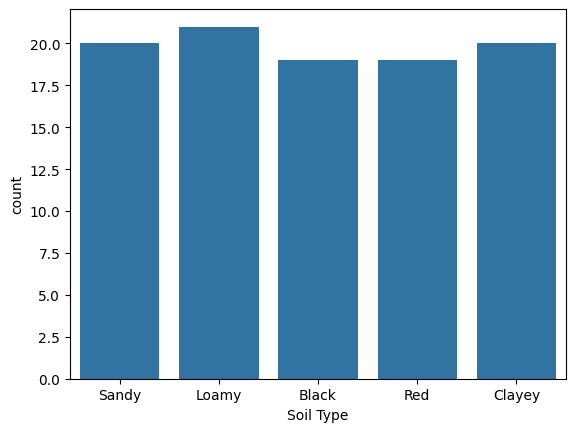

In [6]:
sns.countplot(data=data, x= 'Soil Type')

In [7]:
data['Crop Type'].value_counts()

Crop Type
Sugarcane      13
Cotton         12
Millets        11
Pulses         10
Paddy          10
Wheat           9
Barley          7
Oil seeds       7
Tobacco         7
Ground Nuts     7
Maize           6
Name: count, dtype: int64

<Axes: xlabel='Crop Type', ylabel='count'>

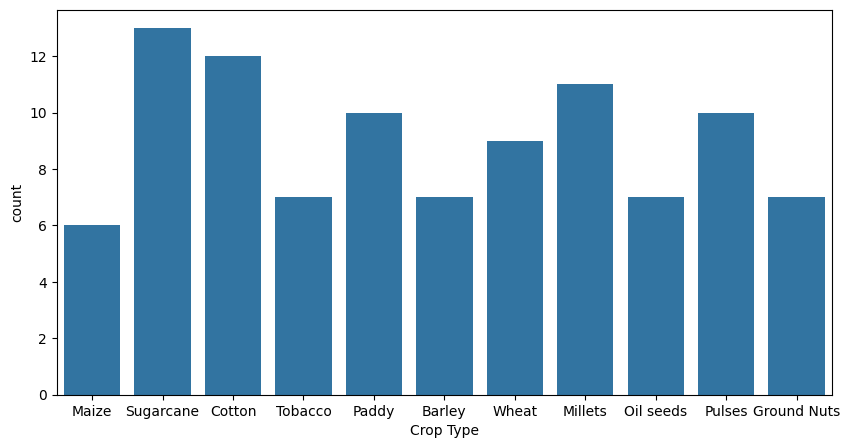

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(x = data['Crop Type'])


In [9]:
data['Fertilizer Name'].value_counts()

Fertilizer Name
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: count, dtype: int64

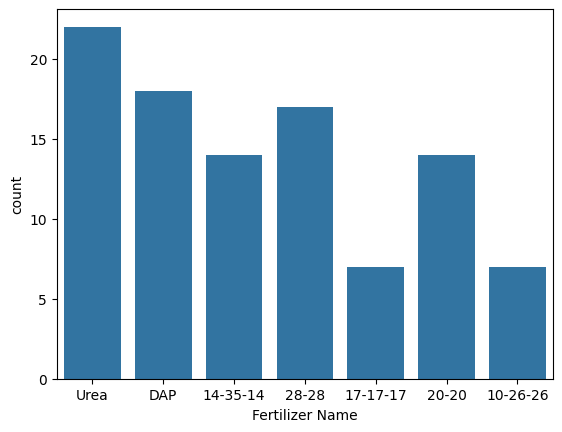

In [10]:
sns.countplot(x = data['Fertilizer Name'])
plt.show()

In [11]:
data.columns
    

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

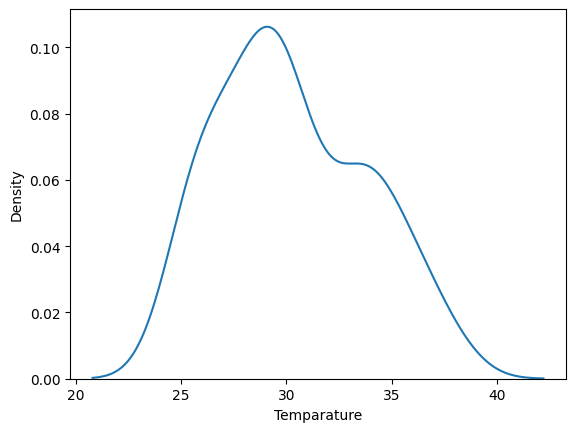

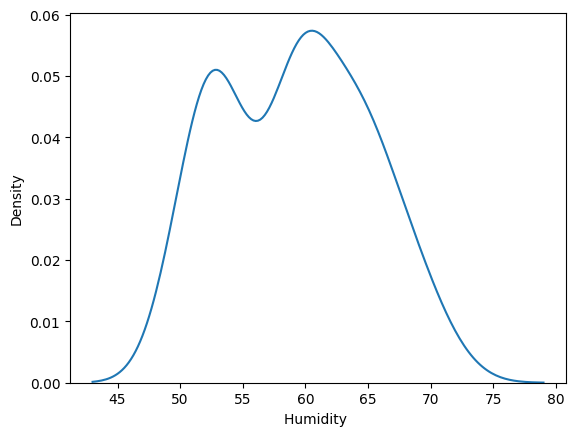

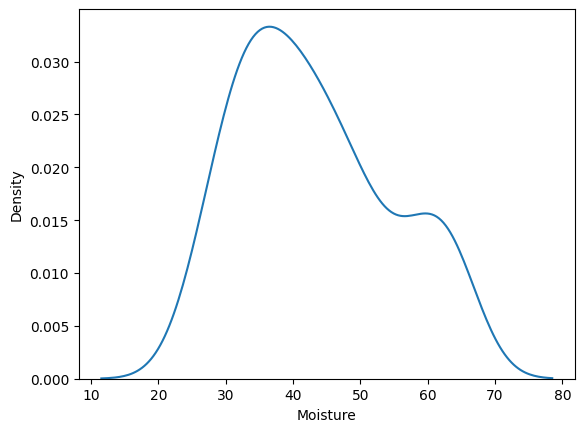

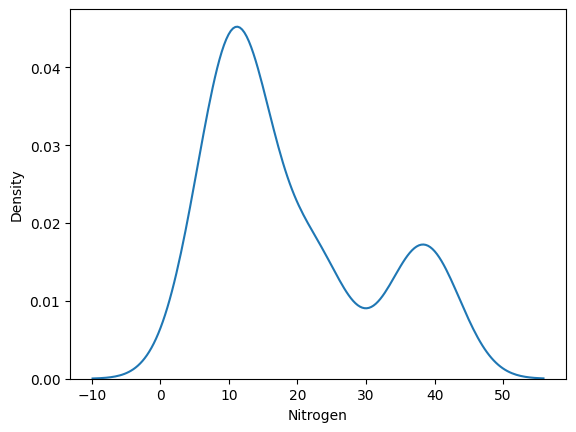

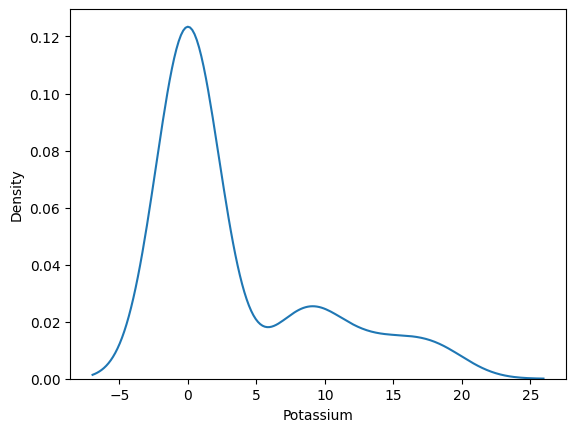

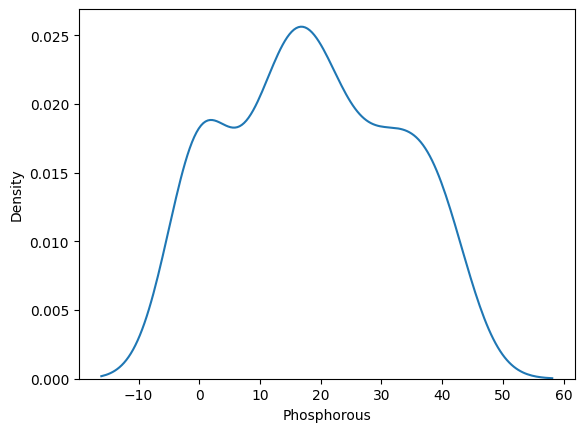

In [12]:

for i, col in enumerate(data.columns):
    if data[col].dtype != 'object':
        sns.kdeplot(data=data, x=col)
        plt.xlabel(col)
        plt.show()
        

        

In [13]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [14]:
X =data.drop(columns='Fertilizer Name')
y = data['Fertilizer Name']

In [15]:
X.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,26,52,38,Sandy,Maize,37,0,0
1,29,52,45,Loamy,Sugarcane,12,0,36
2,34,65,62,Black,Cotton,7,9,30
3,32,62,34,Red,Tobacco,22,0,20
4,28,54,46,Clayey,Paddy,35,0,0


In [16]:
ohe = OneHotEncoder()

In [17]:
encoded_data = ohe.fit_transform(data[['Soil Type', 'Crop Type']]).toarray()

In [18]:
encoded_feature_name = ohe.get_feature_names_out(['Soil Type', 'Crop Type'])

In [19]:
with open ('F:/Crop Prediction/src/models/ohe.pkl', 'wb') as f:
    pickle.dump(ohe, f)

In [20]:
encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_name)

In [21]:
new_df = pd.concat([data, encoded_df], axis=1)

In [22]:
new_df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Soil Type_Black,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
0,26,52,38,Sandy,Maize,37,0,0,Urea,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,34,65,62,Black,Cotton,7,9,30,14-35-14,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32,62,34,Red,Tobacco,22,0,20,28-28,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,28,54,46,Clayey,Paddy,35,0,0,Urea,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [23]:
new_df = new_df.drop(columns=['Soil Type','Crop Type'])

In [24]:
new_df.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
0,26,52,38,37,0,0,Urea,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,52,45,12,0,36,DAP,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,34,65,62,7,9,30,14-35-14,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32,62,34,22,0,20,28-28,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,28,54,46,35,0,0,Urea,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
X = new_df.drop(columns='Fertilizer Name')
y = new_df['Fertilizer Name']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)

In [27]:
X_train.head(1)

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
3,32,62,34,22,0,20,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [29]:
with open('F:/Crop Prediction/src/models/fertilizerScalar.pkl', 'wb') as f:
    pickle.dump(scalar, f)

In [30]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [31]:
with open('F:/Crop Prediction/src/models/fertilizerLabelencoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
log_reg = LogisticRegression()


In [34]:
log_reg.fit(X_train_scaled , y_train_encoded)

LogisticRegression()

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(log_reg.predict(X_train_scaled), y_train_encoded)

1.0

In [36]:
accuracy_score(log_reg.predict(X_test_scaled), y_test_encoded)

0.9

In [37]:
from sklearn.svm import SVC

In [38]:
svc_model = SVC()

In [39]:
svc_model.fit(X_train_scaled, y_train_encoded)

SVC()

In [40]:
accuracy_score(svc_model.predict(X_train_scaled), y_train_encoded)

0.797752808988764

In [41]:
accuracy_score(svc_model.predict(X_test_scaled), y_test_encoded)

0.4

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rnd_clf = RandomForestClassifier()

In [44]:
rnd_clf.fit(X_train_scaled, y_train_encoded)

RandomForestClassifier()

In [45]:
accuracy_score(rnd_clf.predict(X_train_scaled), y_train_encoded)

1.0

In [46]:
accuracy_score(rnd_clf.predict(X_test_scaled), y_test_encoded)

1.0

In [47]:
with open('F:/Crop Prediction/src/models/random_forest_fc.pkl', 'wb') as f:
    pickle.dump(rnd_clf, f)

In [48]:
import pickle
with open('F:/Crop Prediction/src/models/fertilizerScalar.pkl', 'rb') as f:
    scalar_sc = pickle.load(f) 

In [49]:
print("Scaler feature names:", scalar_sc.feature_names_in_)
print("Input feature names:", new_input.columns)


Scaler feature names: ['Temparature' 'Humidity ' 'Moisture' 'Nitrogen' 'Potassium' 'Phosphorous'
 'Soil Type_Black' 'Soil Type_Clayey' 'Soil Type_Loamy' 'Soil Type_Red'
 'Soil Type_Sandy' 'Crop Type_Barley' 'Crop Type_Cotton'
 'Crop Type_Ground Nuts' 'Crop Type_Maize' 'Crop Type_Millets'
 'Crop Type_Oil seeds' 'Crop Type_Paddy' 'Crop Type_Pulses'
 'Crop Type_Sugarcane' 'Crop Type_Tobacco' 'Crop Type_Wheat']


NameError: name 'new_input' is not defined